# Wasserstein GAN
----

In [1]:
from data_generator import *
from models import *
from wgan import *

## Make dataset
----

In [2]:
x, y  = get_cifar10()
x.shape, y.shape

((50000, 32, 32, 3), (50000,))

In [3]:
x_train = x[y==1]
x_train.shape

(5000, 32, 32, 3)

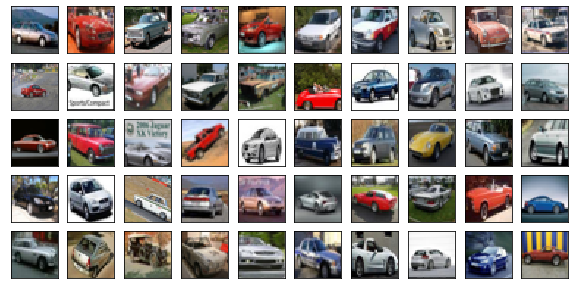

In [7]:
plot_imgs(x_train)

In [5]:
def plot_imgs(imgs):
    r,w=5,10
    plt.figure(figsize=(w,r))
    imgs = 0.5 * (imgs + 1)
    imgs = np.clip(imgs, 0, 1)
    for i in range(w*r):
        plt.subplot(r,w,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgs[i], cmap='gray_r')
    plt.show()

## Make model
----

### Generator

In [8]:
generator = build_generator(100)
#generator.summary()

### Critic

In [9]:
critic = build_critic((32,32,3))
critic.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 4, 4, 128)         0   

## Make WGAN
----

In [10]:
wgan = WGAN(generator, critic)

### compile

In [12]:
wgan.compile( optimizer = 'rmsprop')
wgan.model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_input (InputLayer)     [(None, 100)]             0         
_________________________________________________________________
model (Model)                (None, 32, 32, 3)         884163    
_________________________________________________________________
model_1 (Model)              (None, 1)                 670401    
Total params: 884,163
Trainable params: 879,619
Non-trainable params: 4,544
_________________________________________________________________


### train

In [13]:
wgan.load_weights('results/cifar_2/model.h5')

In [14]:
SAVE_PATH='results/cifar_3'

In [15]:
history = wgan.train( x_train, 32, 200, save_path=SAVE_PATH)

1 [D loss: (0.009)(R -0.071, F 0.089)]  [G loss: -0.028] 
2 [D loss: (-0.000)(R -0.111, F 0.111)]  [G loss: -0.069] 
3 [D loss: (0.031)(R -0.036, F 0.098)]  [G loss: -0.052] 
4 [D loss: (0.027)(R -0.033, F 0.088)]  [G loss: -0.048] 
5 [D loss: (0.010)(R -0.042, F 0.062)]  [G loss: -0.040] 
6 [D loss: (0.016)(R -0.030, F 0.061)]  [G loss: -0.049] 
7 [D loss: (0.010)(R -0.042, F 0.061)]  [G loss: -0.029] 
8 [D loss: (-0.009)(R -0.052, F 0.033)]  [G loss: -0.022] 
9 [D loss: (-0.038)(R -0.089, F 0.013)]  [G loss: -0.040] 
10 [D loss: (-0.039)(R -0.120, F 0.042)]  [G loss: -0.087] 
11 [D loss: (0.020)(R -0.095, F 0.135)]  [G loss: -0.095] 
12 [D loss: (0.008)(R -0.099, F 0.116)]  [G loss: -0.063] 
13 [D loss: (-0.018)(R -0.106, F 0.071)]  [G loss: -0.054] 
14 [D loss: (-0.028)(R -0.122, F 0.065)]  [G loss: -0.055] 
15 [D loss: (-0.071)(R -0.156, F 0.014)]  [G loss: -0.048] 
16 [D loss: (-0.041)(R -0.109, F 0.027)]  [G loss: -0.061] 
17 [D loss: (-0.001)(R -0.161, F 0.158)]  [G loss: -0.088

138 [D loss: (-0.024)(R -0.097, F 0.049)]  [G loss: -0.012] 
139 [D loss: (-0.018)(R -0.064, F 0.028)]  [G loss: 0.011] 
140 [D loss: (-0.015)(R -0.063, F 0.033)]  [G loss: 0.012] 
141 [D loss: (-0.004)(R -0.048, F 0.040)]  [G loss: 0.008] 
142 [D loss: (-0.034)(R -0.065, F -0.003)]  [G loss: 0.020] 
143 [D loss: (-0.006)(R -0.053, F 0.041)]  [G loss: 0.015] 
144 [D loss: (-0.033)(R -0.084, F 0.018)]  [G loss: 0.002] 
145 [D loss: (-0.016)(R -0.069, F 0.038)]  [G loss: -0.016] 
146 [D loss: (-0.027)(R -0.100, F 0.047)]  [G loss: -0.014] 
147 [D loss: (-0.002)(R -0.065, F 0.060)]  [G loss: -0.046] 
148 [D loss: (0.016)(R -0.056, F 0.088)]  [G loss: -0.053] 
149 [D loss: (0.013)(R -0.063, F 0.089)]  [G loss: -0.055] 
150 [D loss: (0.025)(R -0.072, F 0.122)]  [G loss: -0.039] 
151 [D loss: (-0.006)(R -0.054, F 0.042)]  [G loss: -0.037] 
152 [D loss: (0.005)(R -0.048, F 0.058)]  [G loss: -0.008] 
153 [D loss: (-0.002)(R -0.059, F 0.054)]  [G loss: -0.002] 
154 [D loss: (0.004)(R -0.050, F 